<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/practica1/Pr%C3%A1ctica_1_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow



**La base de datos**

In [21]:
from IPython.display import IFrame
url = "https://keras.io/api/datasets/fashion_mnist/"
IFrame(url, width=800, height=600)

## Preparación de TensorFlow

Importamos TensorFlow:

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


## Carga de un conjunto de datos

[Datasets keras](https://keras.io/api/datasets)

In [24]:
mnist_c = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist_c.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

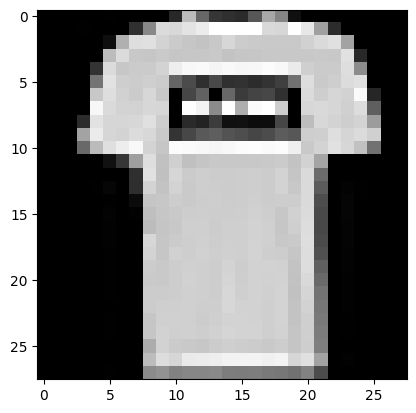

In [25]:
plt.imshow(x_train[1], cmap="gray")

## Creación de un modelo de aprendizaje automático

Cree un modelo `tf.keras.Sequential`:

In [26]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) es útil para apilar capas donde cada una tiene un [tensor](https://www.tensorflow.org/guide/tensor) de entrada y uno de salida. Las capas son funciones con una estructura matemática desconocida que se puede reutilizar y que tiene variables entrenables. La mayoría de los modelos TensorFlow están compuestos por capas. Este modelo usa las capas [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) y [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Para cada ejemplo, el modelo devuelve un vector de [logits](https://developers.google.com/machine-learning/glossary#logits) o puntajes de [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) (registro de probabilidades) por cada clase.

In [27]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.34545735,  1.1609138 ,  1.6727167 , -0.48508286,  1.5006933 ,
         0.18450764,  0.0591234 ,  0.34861818,  1.0751438 , -0.6684729 ]],
      dtype=float32)

La función `tf.nn.softmax` convierte estas funciones logits en *probabilidades* para cada clase:

In [28]:
tf.nn.softmax(predictions).numpy()

array([[0.03300008, 0.1488414 , 0.24831155, 0.02869964, 0.20906827,
        0.05606294, 0.04945637, 0.06606147, 0.13660742, 0.02389083]],
      dtype=float32)

Nota: es posible aplicar la función `tf.nn.softmax` en la función de activación para la última capa de la red. Si bien esto puede hacer que la salida del modelo se interprete más directamente, este enfoque no se recomienda ya que es imposible proporcionar un cálculo de pérdida numéricamente estable y exacto para todos los modelos con salida softmax.

Defina la función de pérdida para el entrenamiento con `losses.SparseCategoricalCrossentropy`:

[Cross entropía binaria](https://www.v7labs.com/blog/cross-entropy-loss-guide)

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

La función de pérdida toma un vector de valores verdaderos de base y un vector de logits y devuelve una pérdida escalar para cada ejemplo. Esta pérdida es igual a la probabilidad de registro negativa de la clase verdadera: La pérdida es cero si el modelo está seguro de la clase correcta.

El modelo sin entrenar arroja probabilidades cercanas al lo aleatorio (1/10 para cada clase), entonces, la pérdida inicial debería estar cerca de `-tf.math.log(1/10) ~= 2.3`.

La entrópia cruzada para un modelo no entrenado `Pérdida=−log(y)`

In [31]:
y_train[y_train[:1]]

array([5], dtype=uint8)

In [32]:
loss_fn(y_train[:1], predictions).numpy()

3.7342606

Antes de empezar el entrenamiento, configure y compile el modelo con Keras `Model.compile`. Configure la clase del [`optimizador`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como `adam`, establezca `loss` para la función `loss_fn` que definió antes y especifique una métrica a evaluar para el modelo, mediante la determinación del parámetro `metrics` para `accuracy`.

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,),
              loss=loss_fn,
              metrics=['accuracy'])

## Entrenamiento y evaluación del modelo

Use el método `Model.fit` para ajustar los parámetros del modelo y minimizar la pérdida:

In [43]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9051 - loss: 0.2523
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9094 - loss: 0.2411
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9075 - loss: 0.2453
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9091 - loss: 0.2400
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9131 - loss: 0.2284
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9137 - loss: 0.2272
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9137 - loss: 0.2277
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9142 - loss: 0.2217
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9142 - loss: 0.2264
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9171 - loss: 0.2179
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9183 - loss: 0.2118
Epoch 12/15
1875/1875 ━━━━━━

El método `Model.evaluate` controla el desempeño del modelo, por lo general con un [conjunto de evaluación](https://developers.google.com/machine-learning/glossary#validation-set) o un [conjunto de prueba](https://developers.google.com/machine-learning/glossary#test-set).

In [44]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 2ms/step - accuracy: 0.8872 - loss: 0.3485


[0.34847334027290344, 0.8871999979019165]

Si desea que su modelo devuelva una probabilidad, puede empaquetar el modelo entrenado y adjuntarle el softmax:

In [45]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [46]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.6980186e-11, 1.6628024e-14, 6.5817658e-15, 1.1293045e-19,
        1.5107235e-16, 1.4888095e-04, 6.1545236e-15, 4.5457989e-04,
        2.0469612e-13, 9.9939656e-01]], dtype=float32)>